# Síntesis en una atmósfera Milne--Eddington

In [1]:
#All libraries necesary:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sin, cos
from copy import deepcopy
import time
import sys

sys.path.append("../")
from mutils2 import *
from milne import *

----------------------------------------------------
Element = SI1
lambda0 = 10827.089
ju=2.0, lu=1, su=1.0
jl=2.0, ll=1, sl=1.0
g_u  = 1.50
g_l  = 1.50
geff = 1.50


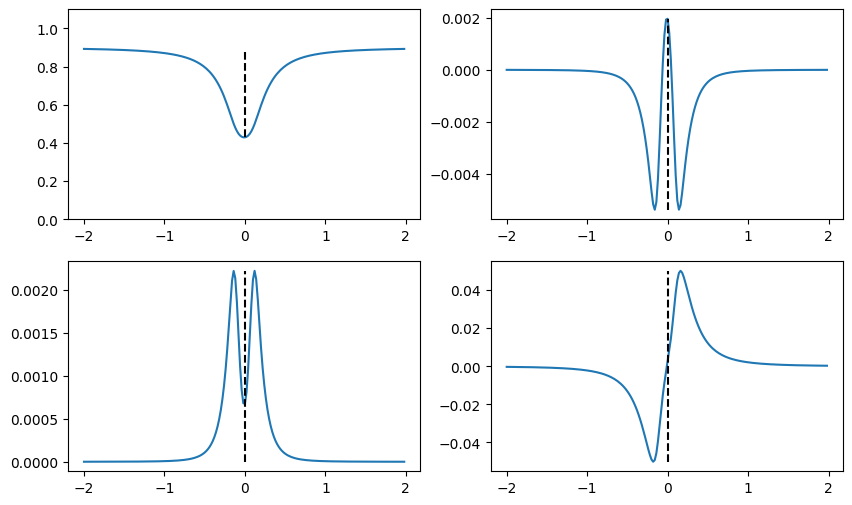

In [3]:
# PARAMETROS:
nlinea = 3                      # Numero linea en fichero
x = np.arange(-2.0,2.0,20e-3)   # Array Longitud de onda
B = 620.                        # Campo magnetico
thetaB = 2.45                   # Inclinacion
phiB = 1.50                     # Angulo azimutal
vlos = -0.25                    # velocidad km/s
eta0 = 4.26                     # Cociente de abs linea-continuo
a = 0.9                         # Parametro de amortiguamiento
ddop = 0.05                     # Anchura Doppler
# Sc = 4.0                      # Cociente Gradiente y Ordenada de la funcion fuente
S_0=0.4                         # Ordenada de la funcion fuente
S_1=0.5                         # Gradiente de la funcion fuente

param = paramLine(nlinea, linefile='../LINEAS.txt')
stokes = stokesSyn(param,x,B,thetaB,phiB,vlos,eta0,a,ddop,S_0,S_1)
for i in range(4):
    plt.subplot(2,2,i+1)
    if i == 0: plt.ylim(0,1.1)
    plt.plot(x,stokes[i])
    plt.plot([0,0],[min(stokes[i]),max(stokes[i])],'k--')

# Análisis del campo magnético

In [4]:
print('Valores iniciales:', B, thetaB*180/np.pi, phiB*180/np.pi)

Valores iniciales: 620.0 140.3746598070517 85.94366926962348


In [5]:
iB, ithetaB, iphiB = initialConditions(stokes,nlinea,x,param)
print(iB, ithetaB*180/np.pi, iphiB*180/np.pi)

587.7524810822598 144.2969185249845 78.46356073575417


# Simulación

In [6]:
campoArray= np.arange(10, 2000, 10)

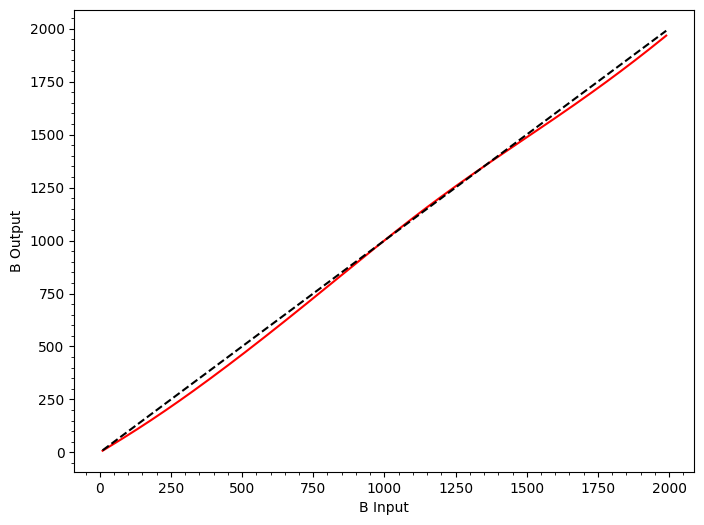

In [11]:
outArray = []
for B in (campoArray):
    stokes = stokesSyn(param,x,B,thetaB,phiB,vlos,eta0,a,ddop,S_0,S_1)
    iB, igamma, ixi = initialConditions(stokes,nlinea,x,param)
    outArray.append(iB)

plt.figure(figsize=(8,6))
plt.plot(campoArray,outArray,'r-')
plt.plot(campoArray,campoArray,'k--')
plt.xlabel('B Input')
plt.ylabel('B Output')
plt.minorticks_on()